In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data_train=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/test.csv")
sample_submission=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/sampleSubmission.csv")
data_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


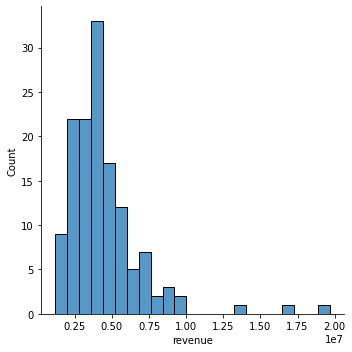

In [ ]:
sns.displot(x='revenue',
            data=data_train);

# выкинем выброс прибыли для более точных результатов


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


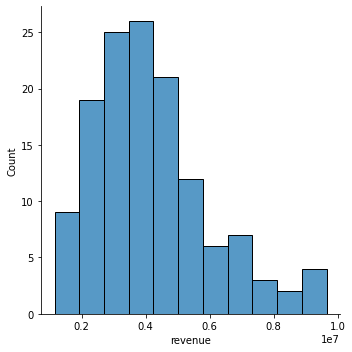

In [ ]:
data_train=data_train.loc[data_train['revenue']<10000000]
sns.displot(x='revenue',
            data=data_train);
data_train

In [ ]:
data_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,1.340000e+02
mean,68.104478,4.014925,4.395522,4.324627,4.373134,2.014925,3.335821,5.432836,5.186567,5.470149,...,3.182836,2.753731,1.947761,2.552239,1.149254,2.507463,2.037313,2.223881,1.119403,4.181438e+06
std,39.788212,2.940475,1.529257,1.042801,1.025404,1.220040,2.151915,2.321679,1.864459,1.846314,...,1.664017,5.585207,3.533550,5.278082,1.710241,5.209515,3.456294,4.199251,1.798265,1.799596e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.250000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.994569e+06
50%,67.500000,3.000000,4.500000,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.887614e+06
75%,102.750000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.001114e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,9.652350e+06


In [ ]:
target='revenue'
p_cols=[i for i in list(data_train.columns)][5:-1]
cat_cols=[i for i in list(data_train.columns)][3:5]

In [ ]:
for i in cat_cols:
  print(str(len(data_train[i].unique())),i)
for i in cat_cols:
  print(str(len(data_test[i].unique())),i)

2 City Group
3 Type
2 City Group
4 Type


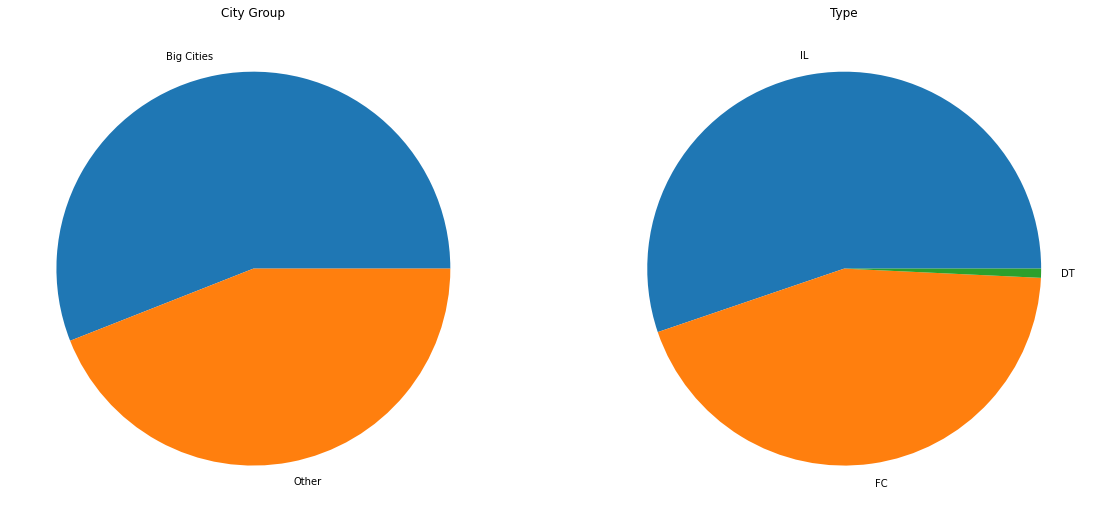

In [ ]:
plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_train[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_train[cat_cols[col]].unique())
  plt.title(cat_cols[col])

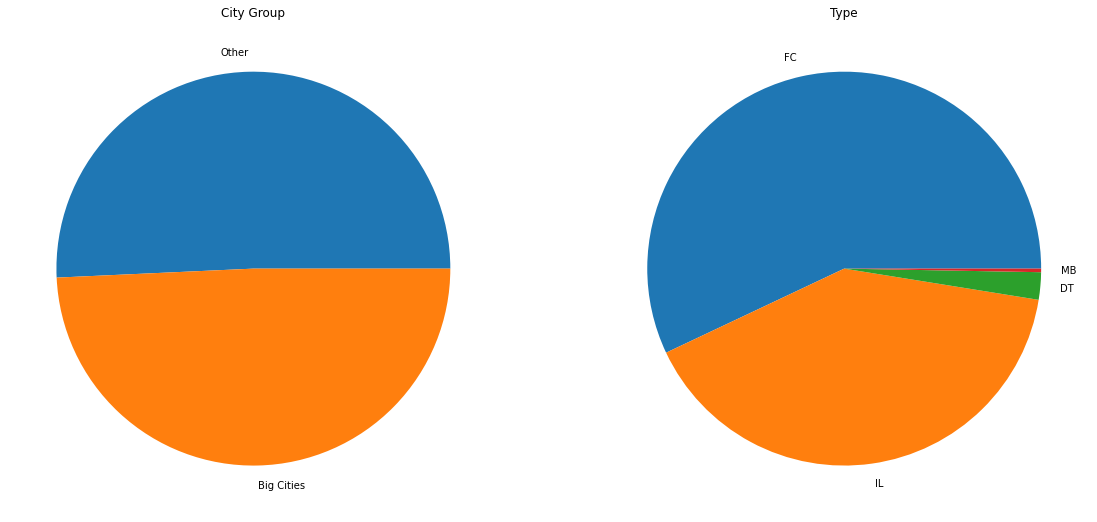

In [ ]:
plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_test[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_test[cat_cols[col]].unique())
  plt.title(cat_cols[col])

In [ ]:
# заменем MB на DT в тестовой выборке тк доля слишком маленькая

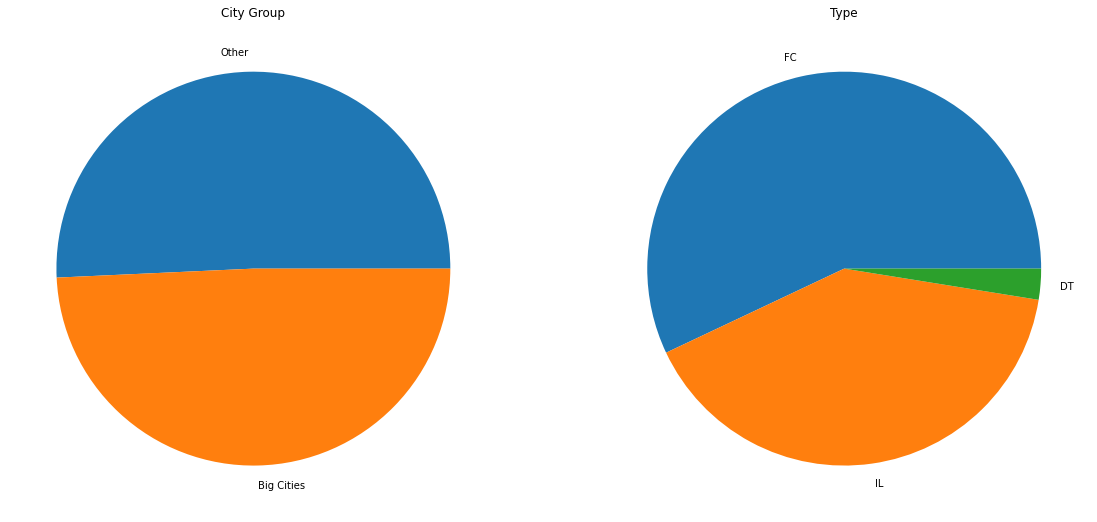

In [ ]:
data_test.loc[data_test['Type']=='MB','Type']='DT'

plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_test[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_test[cat_cols[col]].unique())
  plt.title(cat_cols[col])

# влияние p1-p36 на revenue

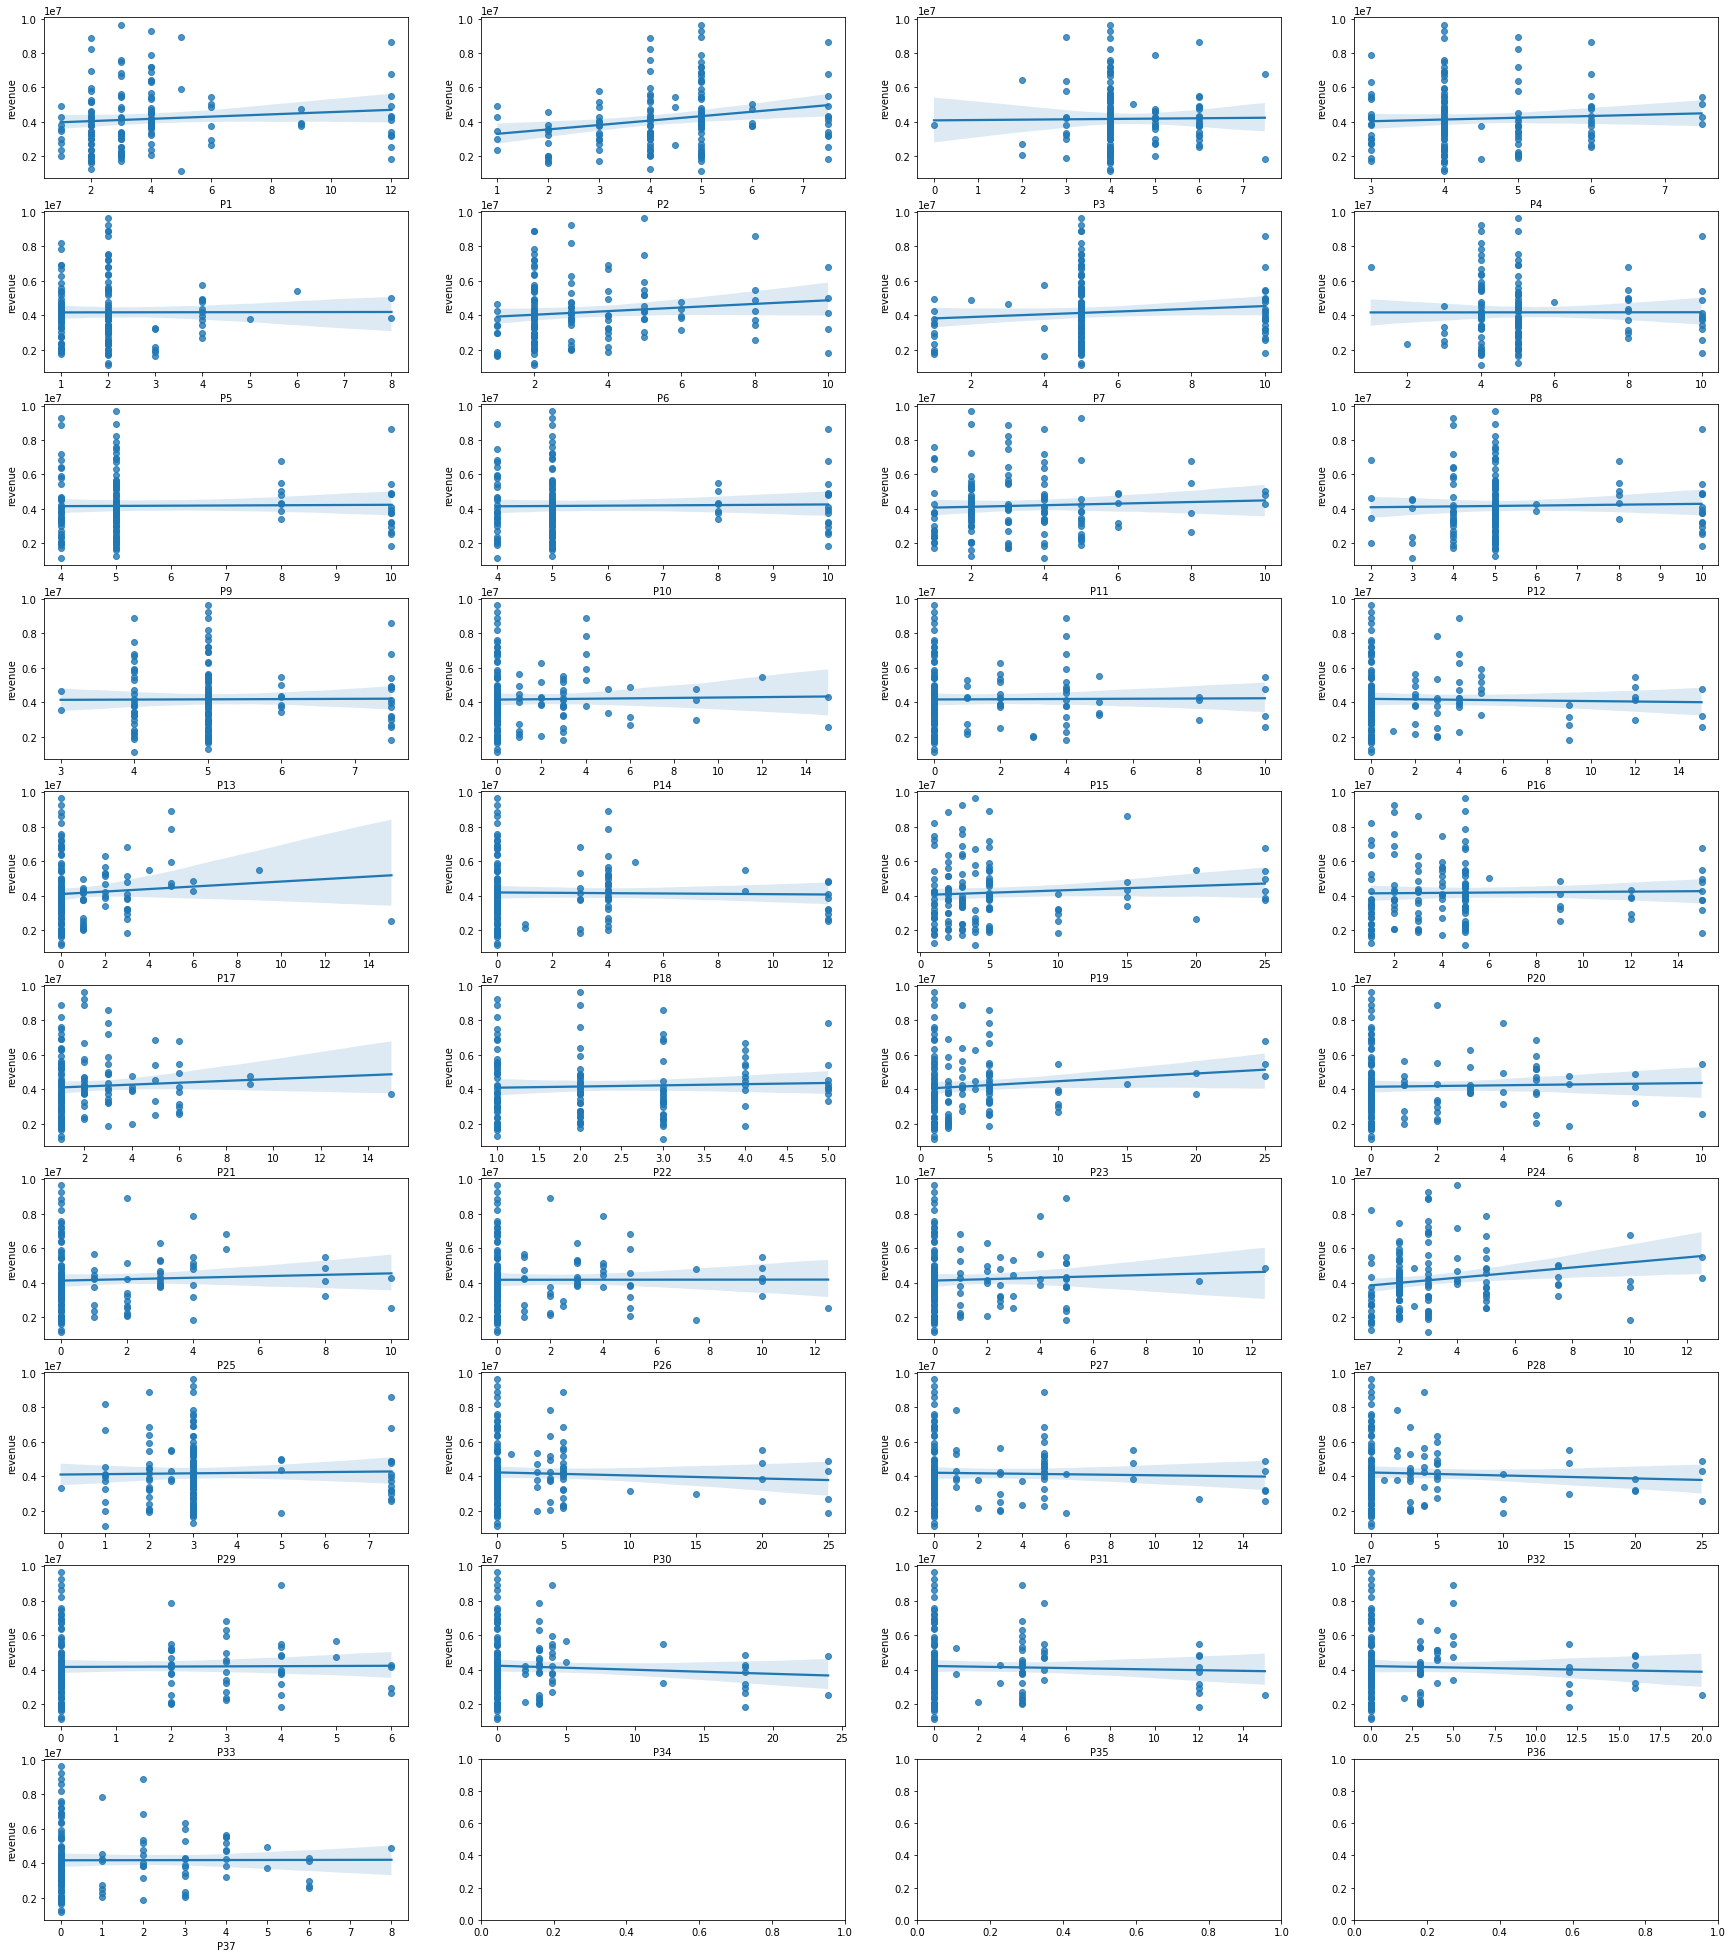

In [ ]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(p_cols, ax.flatten()):
    sns.regplot(x=data_train[variable], y=data_train['revenue'], ax=subplot)

# выберем те которые более менее похожи на зависимости

In [ ]:
p_cols_true=['P1','P2','P6','P11','P19','P20','P21','P28']

разобьем дату основания ресторана на дни с открытия ресторана, год открытия и месяц открытия, думаю что день открытия не играет большой роли

In [ ]:
data_train['OpenDays']=(pd.to_datetime("07/07/2022")-pd.to_datetime(data_train['Open Date'])).dt.days.astype('int16')
data_train['Year']=pd.to_datetime(data_train['Open Date']).dt.year
data_train['Month']=pd.to_datetime(data_train['Open Date']).dt.month
data_train=data_train.drop('Open Date', axis=1)
data_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Year,Month
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,8391,1999,7
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,5257,2008,2
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,3407,2013,3
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,3808,2012,2
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,4807,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,5787594.0,5125,2008,6
133,133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,9262754.0,5747,2006,10
134,134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2544857.0,5843,2006,7
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,7217634.0,4269,2010,10


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
import xgboost
from sklearn.model_selection import GridSearchCV

# буду пробовать случайный лес, так как для задачи регрессии он хорошо подходит
# тк почти не переобучается, не требует предварительного масштабирования данных, хорошо работает с "непонятными данными"


In [ ]:
from sklearn import ensemble
p_data=data_train[p_cols]
cat_data=data_train[cat_cols]
dummy_features = pd.get_dummies(cat_data)
time_data=data_train[['OpenDays','Year','Month']]
time_data.head()
X = pd.concat([dummy_features,time_data,data_train[p_cols_true]], axis=1)
y=data_train[target]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)
param_grid = { 
    'n_estimators': [100,200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
clf = GridSearchCV(estimator=ensemble.RandomForestRegressor(), 
                   param_grid=param_grid,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
Lowest RMSE:  1650921.3637385876


# для примера попробую xgboost

In [ ]:
param_grid_xgboost={'max_depth': range (2,10, 1),
    'n_estimators': range(40, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xlf = GridSearchCV(estimator=xgboost.XGBRegressor(verbosity=0), 
                   param_grid=param_grid_xgboost,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
xlf.fit(X_train, y_train)
print("Best parameters:", xlf.best_params_)
print("Lowest RMSE: ", (-xlf.best_score_)**(1/2.0))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 80}
Lowest RMSE:  1687908.6321466262


In [ ]:
rf = RandomForestRegressor(n_estimators=500, max_features='log2',max_depth=4).fit(X_train,y_train)

print(mean_squared_error(y_test,rf.predict(X_test))**(1/2.0))

1752875.5586642555


In [ ]:
xg=xgboost.XGBRegressor(n_estimators=80,max_depth=2,learning_rate=0.05).fit(X_train,y_train)
print(mean_squared_error(y_test,xg.predict(X_test))**(1/2.0))

[14:00:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1893131.784505324


Можно увидеть что лучший результат получен с подобранными гиперпараметрами для случайного леса регрессии

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


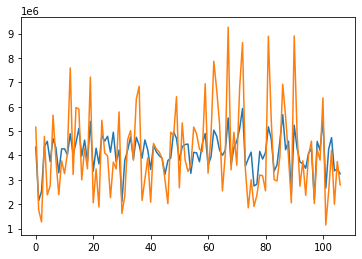

In [ ]:
sns.lineplot(range(len(rf.predict(X_train))),rf.predict(X_train))
sns.lineplot(range(len(y_train)),y_train)

In [ ]:
data_test['OpenDays']=(pd.to_datetime("07/07/2022")-pd.to_datetime(data_test['Open Date'])).dt.days.astype('int16')
data_test['Year']=pd.to_datetime(data_test['Open Date']).dt.year
data_test['Month']=pd.to_datetime(data_test['Open Date']).dt.month
data_test=data_test.drop('Open Date', axis=1)
data_test


,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Year,Month
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,4184,2011,1
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,4129,2011,3
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,3172,2013,10
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,4,0,0,0,0,0,0,3349,2013,5
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,3263,2013,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,8219,2000,1
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,0,0,0,4,0,0,0,4007,2011,7
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,5,3,2,4,4,4,2,3477,2012,12
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,0,0,4,0,0,0,0,3190,2013,10


In [ ]:
p_data_test=data_test[p_cols_true]
cat_data_test=data_test[cat_cols]
dummy_features_test = pd.get_dummies(cat_data_test)
time_data_test=data_test[['OpenDays','Year','Month']]
X_for_test = pd.concat([dummy_features_test,time_data_test,p_data_test], axis=1)

sample_submission['Prediction'] =rf.predict(X_for_test)
sample_submission.to_csv('./my_submission.csv',index=False)
sample_submission

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Id,Prediction
0,0,4.097605e+06
1,1,3.757044e+06
2,2,3.361046e+06
3,3,3.653518e+06
4,4,3.722099e+06
...,...,...
99995,99995,4.849218e+06
99996,99996,3.168588e+06
99997,99997,3.793592e+06
99998,99998,3.438557e+06
